# WARAS APP - BANGKIT ACADEMY 2022

## Machine Learning Model - Deep Neural Network

### Import libraries

In [94]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

Make NumPy printouts easier to read

In [95]:
np.set_printoptions(precision = 3, suppress = True)

### Import dataset

In [96]:
dataset = pd.read_csv ('Data_Clean_3.csv')

### Split dataset into training and testing

In [97]:
x_train = dataset.sample(frac = 0.8, random_state = 0)
x_test = dataset.drop(x_train.index)

Split features from labels

In [98]:
y_train = x_train.copy()
y_test = x_test.copy()

train_labels = y_train.pop('Lama_hari_sembuh')
test_labels = y_test.pop('Lama_hari_sembuh')

### Normalization

Create the layer

In [99]:
normalizer = tf.keras.layers.Normalization(axis = -1, input_shape = [9])

Fit the state of the preprocessing layer to the data

In [100]:
normalizer.adapt(np.asarray(y_train))

Calculate the mean and variance, and store them in the layer

In [101]:
print(normalizer.mean.numpy())

[[34.75   0.547  0.734  0.562  0.469  0.422  0.375  0.172  0.078]]


When the layer is called, it returns the input data, with each feature independently normalized

In [102]:
first = np.array(y_train[:1])

with np.printoptions(precision = 2, suppress = True):
  print('First example:', first)
  print('Normalized:', normalizer(first).numpy())

First example: [[20  0  1  1  1  1  0  0  0]]
Normalized: [[-0.93 -1.1   0.6   0.88  1.06  1.17 -0.77 -0.46 -0.29]]


- The normalization layer (normalizer).
- Two hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.
- A linear Dense single-output layer.

In [103]:
model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(loss = 'mean_absolute_error', metrics = ['mse'],
              optimizer=tf.keras.optimizers.Adam(0.001))

### Train the model with Keras Model.fit

In [104]:
history = model.fit(
    y_train,
    train_labels,
    validation_split = 0.2,
    epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 217ms/step - loss: 12.2467 - mse: 189.1013 - val_loss: 9.2926 - val_mse: 106.2038
Epoch 2/100
2/2 [==============================] - 0s 40ms/step - loss: 12.0720 - mse: 184.8913 - val_loss: 9.1440 - val_mse: 103.0300
Epoch 3/100
2/2 [==============================] - 0s 41ms/step - loss: 11.9039 - mse: 180.3322 - val_loss: 8.9951 - val_mse: 99.9366
Epoch 4/100
2/2 [==============================] - 0s 40ms/step - loss: 11.7356 - mse: 176.1559 - val_loss: 8.8435 - val_mse: 96.8945
Epoch 5/100
2/2 [==============================] - 0s 40ms/step - loss: 11.5622 - mse: 171.7302 - val_loss: 8.6902 - val_mse: 93.8862
Epoch 6/100
2/2 [==============================] - 0s 41ms/step - loss: 11.3901 - mse: 167.5655 - val_loss: 8.5323 - val_mse: 90.8854
Epoch 7/100
2/2 [==============================] - 0s 43ms/step - loss: 11.2048 - mse: 163.1880 - val_loss: 8.3699 - val_mse: 87.8455
Epoch 8/100
2/2 [==============================] - 0s 40ms/

Review the architecture of the network

In [105]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                640       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


### Model Evaluation

Evaluating MAE from the model

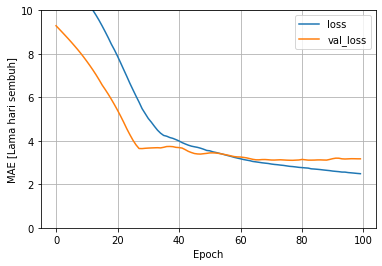

In [106]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('MAE [Lama hari sembuh]')
plt.legend()
plt.grid(True)

Evaluating MSE from the model

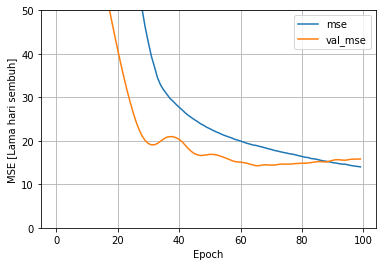

In [107]:
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.ylim([0, 50])
plt.xlabel('Epoch')
plt.ylabel('MSE [Lama hari sembuh]')
plt.legend()
plt.grid(True)

Model evaluation for data testing

In [108]:
model.evaluate(y_test, test_labels)

1/1 [==============================] - 0s 39ms/step - loss: 4.4852 - mse: 32.9928


[4.485204219818115, 32.99281692504883]

### Make predictions

Make predictions with the model on the test dataset using Keras Model.predict and review the loss

Prediction with manual input

In [109]:
Lama_hari_sembuh = model.predict([20, 0, 1, 0, 0, 1, 0, 1, 1])
print ("Lama hari sembuh: ",Lama_hari_sembuh)
print ("Lama hari sembuh: ",np.round(Lama_hari_sembuh))
print ("Lama hari sembuh: ",int(Lama_hari_sembuh))

1/1 [==============================] - 0s 162ms/step
Lama hari sembuh:  [[5.552]]
Lama hari sembuh:  [[6.]]
Lama hari sembuh:  5


### Save the model

In [110]:
#model.save('dnn6_model')